# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Bimo Ade Budiman Fikri
- **Email:** 222111956@stis.ac.id
- **ID Dicoding:** bimoadebudimanfikri

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penjualan berdasarkan jumlah pesanan pada tahun 2017?
- Apakah keterlambatan pengiriman berpengaruh terhadap tingkat kepuasan pelanggan untuk pesanan selama tahun 2017?
- Bagaimana akurasi estimasi waktu pengiriman kami di berbagai wilayah state?

## Import Semua Packages/Library yang Digunakan

In [32]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import locale
from folium.plugins import MarkerCluster

## Data Wrangling

### Gathering Data

In [33]:
# Load dataset
orders = pd.read_csv("data/orders_dataset.csv", usecols=["order_id", "customer_id", "order_estimated_delivery_date", "order_delivered_customer_date", "order_purchase_timestamp"])
order_reviews = pd.read_csv("data/order_reviews_dataset.csv", usecols=["order_id", "review_score"])
customers = pd.read_csv("data/customers_dataset.csv", usecols=["customer_id", "customer_zip_code_prefix", "customer_city", "customer_state"])

"""
    Karena ukuran data sangat besar, maka dilakukan tahapan berikut untuk meringankan proses merge:
    1. Filtering tahun sesuai kebutuhan analisis
    2. Menghapus kolom yang tidak digunakan sebelum merge
"""

# Filter year=2017
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
orders_2017 = orders[orders["order_purchase_timestamp"].dt.year == 2017]

# Drop unused column
orders_2017.drop(columns=["order_purchase_timestamp"], inplace=True)

# Merge process
merged_data = orders_2017.merge(order_reviews, on="order_id", how="left")
final_merged_data = merged_data.merge(customers, on="customer_id", how="left")
final_merged_data.to_csv('dashboard/main_data.csv', index=False)

# Load main_data
main_df = pd.read_csv("dashboard/main_data.csv")
main_df

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20680\977777405.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_2017.drop(columns=["order_purchase_timestamp"], inplace=True)


,order_id,customer_id,order_delivered_customer_date,order_estimated_delivery_date,review_score,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0,3149,sao paulo,SP
1,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-12-02 00:28:42,2017-12-15 00:00:00,5.0,59296,sao goncalo do amarante,RN
2,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,2017-07-26 10:57:55,2017-08-01 00:00:00,4.0,86320,congonhinhas,PR
3,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,NaN,2017-05-09 00:00:00,2.0,98900,santa rosa,RS
4,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,2017-05-26 12:55:51,2017-06-07 00:00:00,5.0,26525,nilopolis,RJ
...,...,...,...,...,...,...,...,...
45426,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,2017-10-20 20:25:45,2017-11-07 00:00:00,5.0,78048,cuiaba,MT
45427,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,2017-02-07 13:15:25,2017-03-17 00:00:00,5.0,35502,divinopolis,MG
45428,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,2017-03-06 11:08:08,2017-03-22 00:00:00,5.0,5127,sao paulo,SP
45429,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-17 15:08:01,2017-03-28 00:00:00,5.0,12209,sao jose dos campos,SP


**Insight:**

Pada proses <b>Gathering Data</b> ini, saya mengumpulkan dan menggabungkan dataset yang relevan untuk menjawab pertanyaan bisnis yang telah dirumuskan. Fokus utama adalah mengoptimalkan performa merging dataset (karena ukuran dataset yang cukup besar sehingga membutuhkan beban komputasi besar) dengan tetap mempertahankan kelengkapan data yang diperlukan untuk menghindari *resource overload*. **Dataset** yang digunakan pada proyek ini antara lain:

1. **`orders_dataset.csv`** → Berisi informasi pesanan dan tanggal pengiriman.
2. **`order_reviews_dataset.csv`** → Berisi skor ulasan pelanggan terkait pesanan.
3. **`customers_dataset.csv`** → Berisi informasi geografis pelanggan.

Selain itu, preprocessing (A dan B) yang dilakukan sebelum merge (C) untuk mengurangi beban komputasi adalah sebagai berikut. 

**A. Filter Data Berdasarkan Tahun 2021**
- Hanya pesanan yang dilakukan pada tahun **2021** yang digunakan.
- `order_purchase_timestamp` dikonversi ke format **datetime** agar dapat difilter berdasarkan tahun.

**B. Drop Kolom yang Tidak Diperlukan**
- Untuk mengurangi beban memori, hanya kolom yang relevan yang dipilih dari setiap dataset:
  - `orders_dataset`: **`order_id, customer_id, order_estimated_delivery_date, order_delivered_customer_date`**
  - `order_reviews_dataset`: **`order_id, review_score`**
  - `customers_dataset`: **`customer_id, customer_zip_code_prefix, customer_city, customer_state`**
- Kolom yang hanya berguna untuk filter tetapi tidak diperlukan dalam analisis, seperti **`order_purchase_timestamp`**, dihapus setelah proses filtering.

**C. Merge Dataset Secara Bertahap**
- **Tahap 1:** Merge `orders_dataset` dengan `order_reviews_dataset` berdasarkan `order_id` (*left join* untuk mempertahankan semua pesanan).
- **Tahap 2:** Merge hasil tersebut dengan `customers_dataset` berdasarkan `customer_id`, sehingga informasi pelanggan dapat digunakan dalam analisis geografis.
- **Tahap 3:** Simpan hasil akhir dalam **`dashboard/main_data.csv`** untuk digunakan lebih lanjut dalam analisis.


### Assessing Data

#### *Missing Value*

In [34]:
missing_values = main_df.isnull().sum()
missing_percentage = (missing_values / len(main_df)) * 100
missing_df = pd.DataFrame({"Missing Values": missing_values, "Percentage (%)": missing_percentage})
print(missing_df[missing_df["Missing Values"] > 0])

                               Missing Values  Percentage (%)
order_delivered_customer_date            1688        3.715525
review_score                              387        0.851841


**Interpretasi:**
- terdapat **3.72%** data yang *missing* pada variabel `order_delivered_customer_date` yang bisa saja terjadi karena pesanan yang **belum dikirimkan** atau **statusnya dibatalkan**.
- terdapat **0.85%** data yang *missing* pada variabel `review_score` yang bisa saja terjadi karena pelanggan **tidak memberikan ulasan** setelah menerima produk.

Karena persentase *missing value* yang kurang dari 5% dari total data maka *record* yang terdapat *missing value* akan dihapus agar menghasilkan analisis yang tidak bias. 


#### *Duplicated Data*

In [35]:
duplicate_rows = main_df.duplicated().sum()
duplicate_percentage = (duplicate_rows / len(main_df)) * 100
print(f"Duplicates: {duplicate_rows} rows ({duplicate_percentage:.2f}% from total data)")

Duplicates: 206 rows (0.45% from total data)


**Interpretasi:**
- Terdapat 206 baris duplikasi yang ditemukan yang bisa saja terjadi karena **kesalahan sistem**, **pengambilan data ganda**, atau **inkonsistensi dalam penginputan**. Dupliasi tersebut perlu dihapus agar tidak menimbulkan bias menimbang total data yang di-drop hanya 0.45%

#### *Inaccurate Value*

In [36]:
# Cek nilai unik dalam customer_state
sorted_unique_state = sorted(main_df["customer_state"].dropna().unique(), key=str.lower)

# Tampilkan hasil
print(f"Unique customer_state: {len(sorted_unique_state)}")
print(", ".join(sorted_unique_state))

Unique customer_state: 27
AC, AL, AM, AP, BA, CE, DF, ES, GO, MA, MG, MS, MT, PA, PB, PE, PI, PR, RJ, RN, RO, RR, RS, SC, SE, SP, TO


**Interpretasi:**

Jumlah unik dari `customer_state` sudah sesuai dengan jumlah di realita yaitu Brasil memiliki 26 state dan 1 federal district.

*sumber: https://en.wikipedia.org/wiki/Federative_units_of_Brazil*

#### *Outliers*

In [37]:
main_df["order_estimated_delivery_date"] = pd.to_datetime(main_df["order_estimated_delivery_date"])
main_df["order_delivered_customer_date"] = pd.to_datetime(main_df["order_delivered_customer_date"])

# Hitung jumlah hari keterlambatan pengiriman
main_df["shipping_delay_days"] = (main_df["order_delivered_customer_date"] - main_df["order_estimated_delivery_date"]).dt.days

Diperlukan variabel turunan yaitu `shipping_delay_days` yang merepresentasikan berapa perbedaan hari estimasi produk sampai dan kenyataannya. Variabel ini dihitung dengan menghitung selisih antara `order_delivered_customer_date` dan `order_estimated_delivery_date`

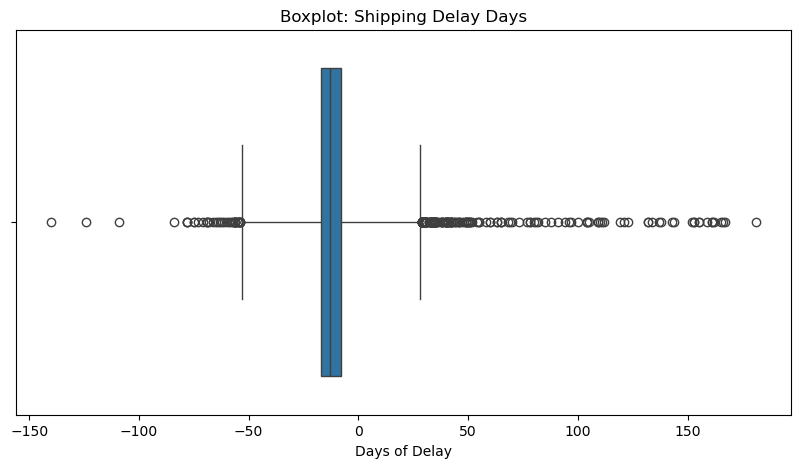

In [38]:
# Metode visual: boxplot
plt.figure(figsize=(10,5))
sns.boxplot(x=main_df["shipping_delay_days"], whis=4)
plt.title("Boxplot: Shipping Delay Days")
plt.xlabel("Days of Delay")
plt.show()

In [39]:
# Metode numerik: IQR
q1 = main_df["shipping_delay_days"].quantile(0.25)
q3 = main_df["shipping_delay_days"].quantile(0.75)
iqr = q3 - q1

threshold = 4 
lower_bound = q1 - (threshold * iqr)
upper_bound = q3 + (threshold * iqr)

# Identifikasi outlier
outliers = main_df[(main_df["shipping_delay_days"] < lower_bound) | (main_df["shipping_delay_days"] > upper_bound)]
outlier_percentage = (outliers.shape[0] / len(main_df)) * 100
print(f"Outliers counts: {outliers.shape[0]} ({outlier_percentage:.2f}% from total data)")

Outliers counts: 211 (0.46% from total data)


**Interpretasi:**

Berdasarkan output dari metode visual dan numerik ditemukan terdapat 211 outlier. Pemilihan `threshold = 4` sebagai *whiskers* karena mengikuti batas waktu pengiriman e-commerce pada umumnya yaitu tidak lebih dari 30 hari. Dengan pertimbangan persentase outliers hanya sebesar 0.46%, maka data outlier akan di-drop pada fase cleaning.

### Cleaning Data

In [40]:
df_cleaned = main_df.dropna()
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned = df_cleaned[(df_cleaned["shipping_delay_days"] >= lower_bound) & (df_cleaned["shipping_delay_days"] <= upper_bound)]

print(f"Jumlah data setelah menghapus outlier: {len(df_cleaned)}")
df_cleaned.to_csv('dashboard/main_data.csv', index=False)

Jumlah data setelah menghapus outlier: 43016


**Insight:**

- **Jumlah data awal**: Sebelum pembersihan, dataset memiliki data dengan kemungkinan *missing values*, duplikasi, dan *outlier*.
- **Missing values**: Semua baris dengan nilai kosong telah dihapus untuk memastikan kualitas data.
- **Duplicate values**: Data duplikat telah dihapus untuk menghindari bias dalam analisis.
- **Outlier handling**: Menggunakan metode **IQR (Interquartile Range)** untuk mendeteksi dan menghapus *outlier* dalam variabel keterlambatan pengiriman.

**Setelah Pembersihan**
- **Total data yang tersisa**: **43,016 baris**

Dataset yang telah dibersihkan kini siap untuk analisis keterlambatan pengiriman, kepuasan pelanggan, dan distribusi geografis pelanggan tanpa gangguan dari data yang tidak valid atau ekstrem.File cleaning kemudian disimpan kembali di `dashboard/main_data_cleaned.csv`

## Exploratory Data Analysis (EDA)

### Explore Data Type

In [41]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 43016 entries, 0 to 45430
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       43016 non-null  object        
 1   customer_id                    43016 non-null  object        
 2   order_delivered_customer_date  43016 non-null  datetime64[ns]
 3   order_estimated_delivery_date  43016 non-null  datetime64[ns]
 4   review_score                   43016 non-null  float64       
 5   customer_zip_code_prefix       43016 non-null  int64         
 6   customer_city                  43016 non-null  object        
 7   customer_state                 43016 non-null  object        
 8   shipping_delay_days            43016 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 3.3+ MB
None


### Explore Numeric Variables

In [42]:
print("Numeric Summary:")
print(df_cleaned[['review_score', 'shipping_delay_days']].describe())

Numeric Summary:
       review_score  shipping_delay_days
count  43016.000000         43016.000000
mean       4.179956           -12.602799
std        1.250586             8.249342
min        1.000000           -53.000000
25%        4.000000           -17.000000
50%        5.000000           -13.000000
75%        5.000000            -8.000000
max        5.000000            28.000000


### Explore Categorical Variables

In [43]:
for col in ["review_score", "customer_state"]:
    print(f"Categorical Summary {col}:")
    print(df_cleaned[col].value_counts())
    print("\n")

Categorical Summary review_score:
review_score
5.0    25475
4.0     8739
1.0     3797
3.0     3667
2.0     1338
Name: count, dtype: int64


Categorical Summary customer_state:
customer_state
SP    16948
RJ     5859
MG     5206
RS     2576
PR     2184
SC     1639
BA     1500
ES      927
GO      909
DF      881
PE      728
CE      635
PA      484
MT      403
MA      363
MS      293
PB      239
RN      226
PI      212
AL      193
SE      182
RO      133
TO      128
AM       71
AC       53
AP       27
RR       17
Name: count, dtype: int64




### Explore Distributions

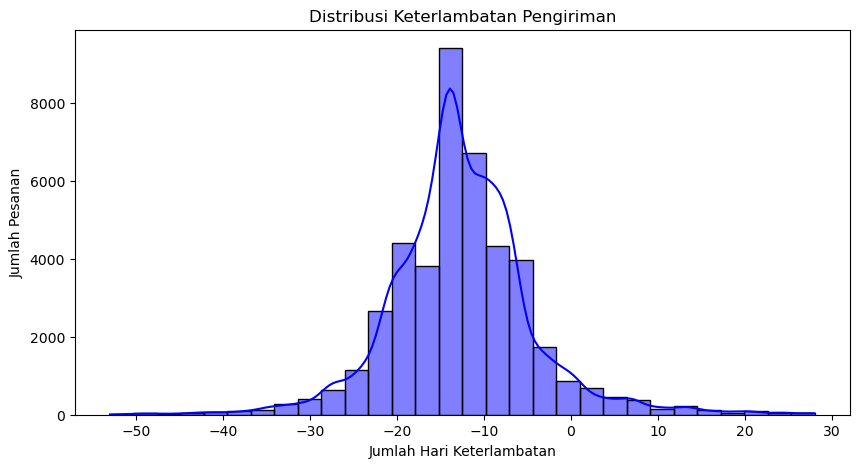

Jumlah total pesanan: 43016
Jumlah pesanan yang tepat waktu: 424
Jumlah pesanan yang terlambat (positif): 2232
Jumlah pesanan yang lebih cepat dari estimasi (negatif): 40360


In [44]:
# Distribusi keterlambatan (shipping_delay_days)
plt.figure(figsize=(10,5))
sns.histplot(df_cleaned["shipping_delay_days"], bins=30, kde=True, color="blue")
plt.title("Distribusi Keterlambatan Pengiriman")
plt.xlabel("Jumlah Hari Keterlambatan")
plt.ylabel("Jumlah Pesanan")
plt.show()

# keterangan tambahan
delayed_positive = df_cleaned[df_cleaned["shipping_delay_days"] > 0].shape[0]
delayed_negative = df_cleaned[df_cleaned["shipping_delay_days"] < 0].shape[0]
on_time = df_cleaned[df_cleaned["shipping_delay_days"] == 0].shape[0]

print(f"Jumlah total pesanan: {df_cleaned.shape[0]}")
print(f"Jumlah pesanan yang tepat waktu: {on_time}")
print(f"Jumlah pesanan yang terlambat (positif): {delayed_positive}")
print(f"Jumlah pesanan yang lebih cepat dari estimasi (negatif): {delayed_negative}")


### Multivariate EDA

#### Scatter Plot `shipping_delay_days` dan `review_score`

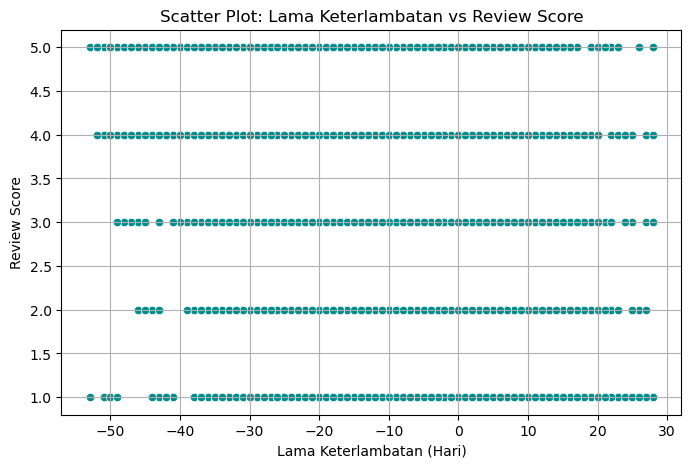

In [45]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_cleaned, x="shipping_delay_days", y="review_score", color="darkcyan")
plt.title("Scatter Plot: Lama Keterlambatan vs Review Score")
plt.xlabel("Lama Keterlambatan (Hari)")
plt.ylabel("Review Score")
plt.grid(True)
plt.show()

Scatter plot di atas menunjukkan bahwa **keterlambatan pengiriman** memiliki hubungan dengan **review score** dari pelanggan. Pesanan dengan keterlambatan lebih besar cenderung memiliki lebih banyak review score rendah, terutama pada skor 1 dan 2. Namun, terdapat variasi yang cukup besar, di mana beberapa pesanan yang dikirim lebih cepat tetap menerima ulasan buruk, sementara pesanan yang terlambat masih mendapatkan skor tinggi. Hal ini diduga adanya faktor lain yang memengaruhi review score sehingga butuh analisis lebih lanjut.

#### Pairplot `shipping_delay_days` dan `review_score`

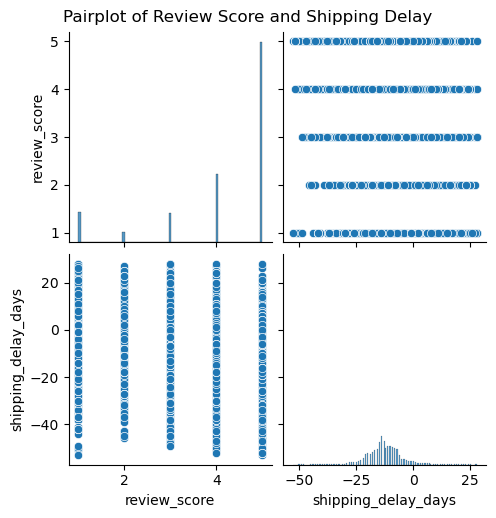

In [46]:
sns.pairplot(df_cleaned[['review_score', 'shipping_delay_days']])
plt.suptitle("Pairplot of Review Score and Shipping Delay", y=1.02)
plt.show()

Histogram **keterlambatan** menunjukkan bahwa sebagian besar pesanan mengalami keterlambatan ringan hingga sedang dan sedikit keterlambatan ekstrem. Distribusi **review score** tersegmentasi secara jelas, yang menunjukkan bahwa meskipun keterlambatan sering dikaitkan dengan review buruk, masih ada variasi dalam penilaian pelanggan. Hal ini mengonfirmasi scatter plot sebelumnya bahwa keterlambatan pengiriman memang berdampak, tetapi bukan satu-satunya faktor yang memengaruhi kepuasan pelanggan.

##### Scatter Plot `shipping_delay_days` dan `review_score`berdasarkan `cusomer_state`

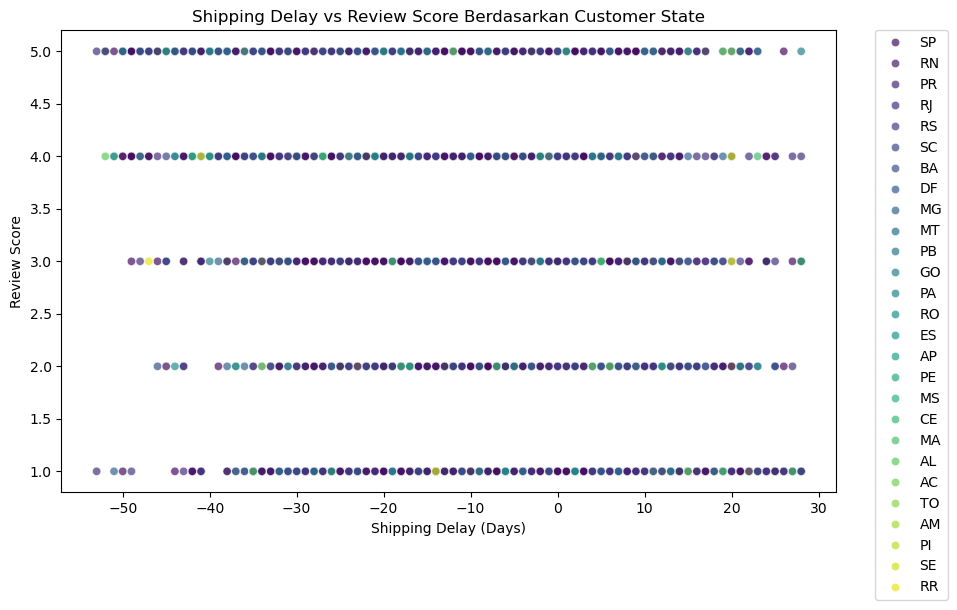

In [47]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_cleaned, x="shipping_delay_days", y="review_score", hue="customer_state", palette="viridis", alpha=0.7)
plt.title("Shipping Delay vs Review Score Berdasarkan Customer State")
plt.xlabel("Shipping Delay (Days)")
plt.ylabel("Review Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Visualisasi ini menunjukkan hubungan antara **keterlambatan pengiriman** dan **review score** di berbagai negara bagian di Brasil. Keterlambatan tersebar merata di berbagai wilayah tanpa ada perbedaan signifikan dalam pola antar negara bagian sehingga diperlukan analisis geospasial lebih lanjut untuk melihat sebaran keterlambatan di berbagai daerah untuk mendapatkan insight yang lebih.

### Aggregation

#### Pivot Table untuk Pertanyaan 1

In [48]:
df_cleaned["order_delivered_customer_date"] = pd.to_datetime(df_cleaned["order_delivered_customer_date"])
df_2017 = df_cleaned[df_cleaned["order_delivered_customer_date"].dt.year == 2017].copy()
df_2017["order_month_num"] = df_2017["order_delivered_customer_date"].dt.month
bulan_mapping = {1:"Januari", 2:"Februari", 3:"Maret", 4:"April", 5:"Mei", 6:"Juni",7:"Juli", 8:"Agustus", 9:"September", 10:"Oktober", 11:"November", 12:"Desember"}
df_2017["order_month"] = df_2017["order_month_num"].map(bulan_mapping)

# Buat pivot table: jumlah pesanan per bulan
pivot_trend_sales = df_2017.pivot_table(index="order_month", values="order_id", aggfunc="count")
bulan_sorted = ["Januari", "Februari", "Maret", "April", "Mei", "Juni", "Juli", "Agustus", "September", "Oktober", "November", "Desember"]
pivot_trend_sales = pivot_trend_sales.reindex(bulan_sorted, fill_value=0)
pivot_trend_sales.rename(columns={"order_id": "Jumlah Pesanan"}, inplace=True)

print("Pivot Table - Tren Penjualan (Jumlah Pesanan per Bulan 2017):")
print(pivot_trend_sales)

Pivot Table - Tren Penjualan (Jumlah Pesanan per Bulan 2017):
             Jumlah Pesanan
order_month                
Januari                 280
Februari               1334
Maret                  2365
April                  1835
Mei                    3728
Juni                   3202
Juli                   3437
Agustus                4288
September              3901
Oktober                4471
November               4641
Desember               7149


#### Pivot Table ntuk Pertanyaan 2

In [49]:
# Buat pivot table: rata-rata keterlambatan dan jumlah pesanan per review score
pivot_delay_review = df_2017.pivot_table(index="review_score", values="shipping_delay_days", aggfunc=["mean", "count"])
pivot_delay_review.columns = ["Rata-rata Keterlambatan", "Jumlah Pesanan"]
pivot_delay_review = pivot_delay_review.sort_index()

print("Pivot Table - Keterlambatan vs Review Score:")
print(pivot_delay_review)

Pivot Table - Keterlambatan vs Review Score:
              Rata-rata Keterlambatan  Jumlah Pesanan
review_score                                         
1.0                         -8.306098            3280
2.0                        -10.805671            1199
3.0                        -12.014864            3431
4.0                        -12.929854            8297
5.0                        -13.817229           24424


#### Pivot Table untuk Pertanyaan 3

In [50]:
# Buat pivot table: rata-rata keterlambatan dan jumlah pesanan per state
pivot_state = df_2017.pivot_table(index="customer_state", values="shipping_delay_days", aggfunc=["mean", "count"])
pivot_state.columns = ["Rata-rata Keterlambatan", "Jumlah Pesanan"]
pivot_state = pivot_state.sort_index()

print("Pivot Table - Akurasi Estimasi Pengiriman per State:")
print(pivot_state)

Pivot Table - Akurasi Estimasi Pengiriman per State:
                Rata-rata Keterlambatan  Jumlah Pesanan
customer_state                                         
AC                           -18.229167              48
AL                            -9.131148             183
AM                           -19.754098              61
AP                           -20.727273              22
BA                           -13.234731            1359
CE                           -14.117338             571
DF                           -13.297590             830
ES                           -12.788863             862
GO                           -14.170468             833
MA                           -13.056782             317
MG                           -14.043636            4973
MS                           -13.188406             276
MT                           -15.327027             370
PA                           -17.092593             432
PB                           -14.492823            

## Visualization & Explanatory Analysis

### Pertanyaan 1:

***Bagaimana tren penjualan berdasarkan jumlah pesanan pada tahun 2017?***

**Answer:**

Jumlah penjualan dapat didekati dengan jumlah pesanan yang terkirim, sehingga variabel yang diperlukan untuk menjawab **Pertanyaan 1** adalah `order_delivered_customer_date` lalu divisualisasikan dengan **line chart** 

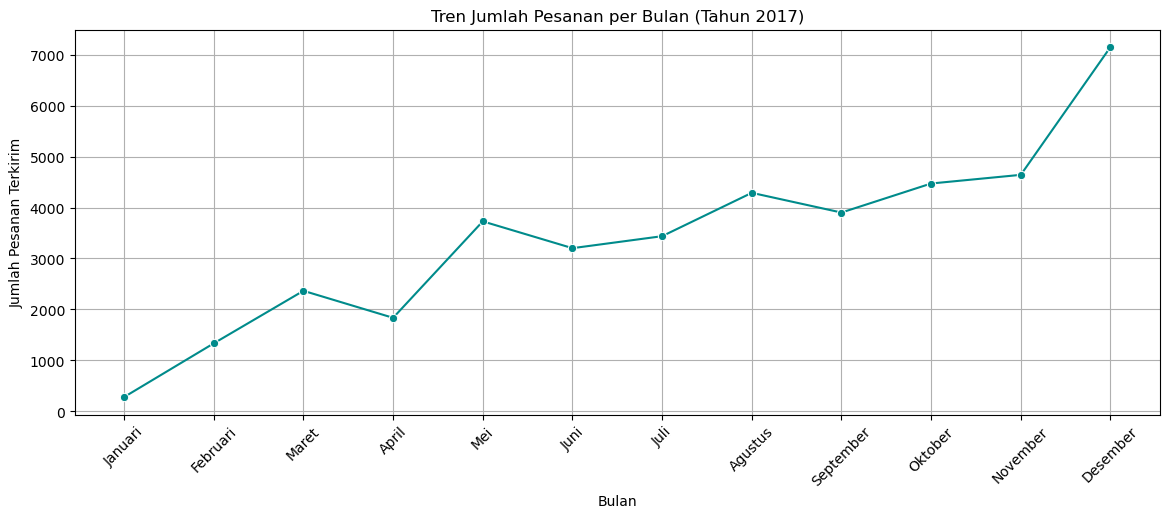

In [51]:
locale.setlocale(locale.LC_TIME, "id_ID.UTF-8")
df_cleaned["order_delivered_customer_date"] = pd.to_datetime(df_cleaned["order_delivered_customer_date"])
df_2017 = df_cleaned[df_cleaned["order_delivered_customer_date"].dt.year == 2017].copy()
df_2017["order_month"] = df_2017["order_delivered_customer_date"].dt.strftime("%B")

bulan_sorted = ["Januari", "Februari", "Maret", "April", "Mei", "Juni", "Juli", "Agustus", "September", "Oktober", "November", "Desember"]
monthly_orders = df_2017["order_month"].value_counts().reindex(bulan_sorted, fill_value=0)

# Plot Line Chart
plt.figure(figsize=(14,5))
sns.lineplot(x=monthly_orders.index, y=monthly_orders.values, marker="o", linestyle="-", color="darkcyan")
plt.xticks(rotation=45)
plt.title("Tren Jumlah Pesanan per Bulan (Tahun 2017)")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan Terkirim")
plt.grid(True)
plt.show()

**insights:**

- Secara keseluruhan, jumlah pesanan mengalami peningkatan sepanjang tahun, dengan lonjakan signifikan pada bulan Desember yang mencapai lebih dari 7.000 pesanan.
- Beberapa fluktuasi terjadi, seperti penurunan pada bulan April dan September setelah peningkatan di bulan sebelumnya. Puncak pertama terjadi di bulan Mei, namun jumlah pesanan sedikit menurun di bulan Juni sebelum kembali meningkat secara bertahap.
- Lonjakan pesanan di akhir tahun bisa saja  dipengaruhi oleh tren belanja akhir tahun dan strategi promosi. Sebaliknya, penurunan di bulan tertentu bisa disebabkan oleh faktor musiman atau perubahan pola belanja pelanggan di masyarakat yang perly analisis lebih lanjut.

### Pertanyaan 2:

***Apakah keterlambatan pengiriman berpengaruh terhadap tingkat kepuasan pelanggan untuk pesanan selama tahun 2017?***

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20680\1641846849.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_2017["review_score"], y=df_2017["shipping_delay_days"], palette="coolwarm")


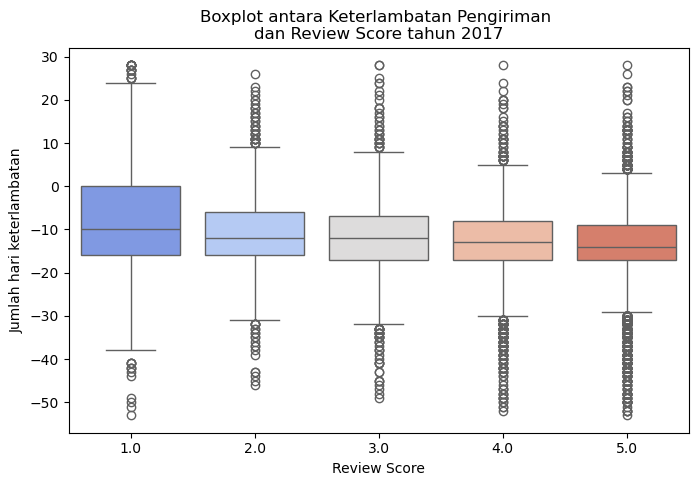

Korelasi antara keterlambatan pengiriman dan review score: -0.1954


In [52]:
# Metode Visual: Box-Plot
plt.figure(figsize=(8,5))
sns.boxplot(x=df_2017["review_score"], y=df_2017["shipping_delay_days"], palette="coolwarm")
plt.title("Boxplot antara Keterlambatan Pengiriman \ndan Review Score tahun 2017")
plt.xlabel("Review Score")
plt.ylabel("Jumlah hari keterlambatan")
plt.show()

# Metode Numerik: Pearson Correlation
correlation = df_2017["shipping_delay_days"].corr(df_2017["review_score"])
print(f"Korelasi antara keterlambatan pengiriman dan review score: {correlation:.4f}")

**Insights:**

- Dari boxplot terlihat bahwa semakin lama **keterlambatan pengiriman** maka semakin rendah pula **review score** yang diberikan pelanggan. Pesanan dengan review buruk (skor 1 dan 2) cenderung mengalami keterlambatan lebih besar dibandingkan dengan pesanan yang mendapat rating tinggi. Namun, meskipun review dengan skor 4 dan 5 memiliki keterlambatan yang lebih kecil, tetap ada beberapa kasus keterlambatan signifikan.
- Hal menarik ketika terdapat  pesanan dengan keterlambatan minimal yang tetap menerima review buruk. Hal tersebut menunjukkan bahwa faktor lain seperti kualitas produk dan layanan pelanggan turut mempengaruhi kepuasan pelanggan yang mana sejalan dengan nilai korelasi Pearson sebesar `-0.1954`. Nilai tersebut  menunjukkan hubungan negatif dan lemah, artinya keterlambatan memang berpengaruh terhadap rating pelanggan, tetapi bukan satu-satunya faktor penentu. Faktor lain seperti ekspektasi pelanggan, kondisi produk, dan interaksi dengan layanan pelanggan juga berperan dalam menentukan kepuasan dan rating yang diberikan.

Oleh karena itu, selain mengurangi **keterlambatan pengiriman**, perbaikan pada aspek layanan pelanggan dan kualitas produk juga diperlukan untuk meningkatkan rating secara keseluruhan.

## Analisis Lanjutan (Opsional)

### Pertanyaan 2:

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20680\973840881.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_review_avg = df_2017.groupby("delay_category")["review_score"].mean()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20680\973840881.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_review_avg.index, y=delay_review_avg.values, palette="magma")


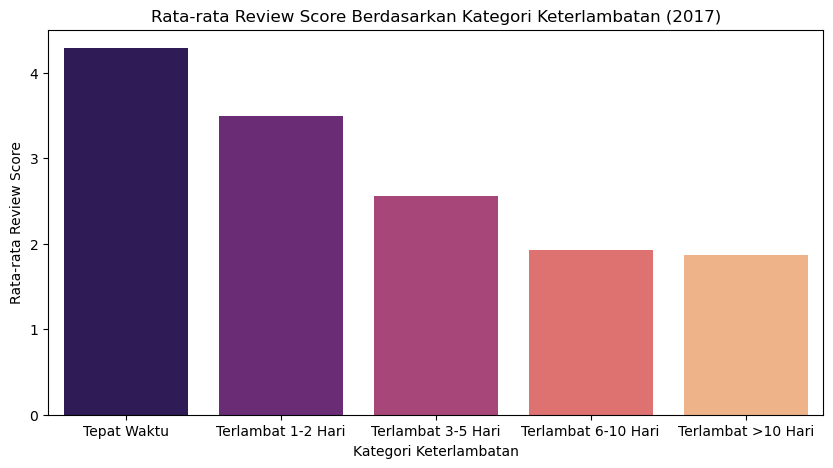

In [53]:
# Buat kategori keterlambatan
df_2017["delay_category"] = pd.cut(df_2017["shipping_delay_days"], 
                                   bins=[float('-inf'), 0, 2, 5, 10, float('inf')], 
                                   labels=["Tepat Waktu", "Terlambat 1-2 Hari", "Terlambat 3-5 Hari", "Terlambat 6-10 Hari", "Terlambat >10 Hari"])

# Hitung rata-rata skor review per kategori keterlambatan
delay_review_avg = df_2017.groupby("delay_category")["review_score"].mean()

# Visualisasi
plt.figure(figsize=(10,5))
sns.barplot(x=delay_review_avg.index, y=delay_review_avg.values, palette="magma")
plt.title("Rata-rata Review Score Berdasarkan Kategori Keterlambatan (2017)")
plt.xlabel("Kategori Keterlambatan")
plt.ylabel("Rata-rata Review Score")
plt.show()

**Insights:**

Apabila kita mengkategorisasi keterlambatan dalam 5 kategori yaitu: 
- *tepat waktu*
- *terlambat 1-2 hari*
- *terlambat 3-5 hari* 
- *Terlambat 6-10 hari*
- *Terlambat >10 hari*

Maka, Bar chart semakin menegaskan bahwa keterlambatan pengiriman berkontribusi terhadap penurunan review score pelanggan. Pesanan yang dikirim tepat waktu memiliki rata-rata review tertinggi, sementara keterlambatan yang semakin lama menyebabkan penurunan skor yang signifikan, terutama setelah 3-5 hari keterlambatan. Hasil ini konsisten dengan boxplot sebelumnya, yang menunjukkan keterlambatan lebih sering terjadi pada review rendah, serta korelasi Pearson `(-0.1954)` yang mengindikasikan hubungan **negatif-lemah**.

### Pertanyaan 3:

***Bagaimana akurasi estimasi waktu pengiriman kami di berbagai wilayah state?***

In [54]:
# Rata-rata per State
state_delay = main_df.groupby("customer_state")["shipping_delay_days"].mean().reset_index()
print(state_delay)

   customer_state  shipping_delay_days
0              AC           -19.509434
1              AL            -8.597015
2              AM           -17.135135
3              AP           -15.714286
4              BA           -11.622482
5              CE           -12.786604
6              DF           -12.933857
7              ES           -11.964323
8              GO           -13.187702
9              MA           -11.582210
10             MG           -13.805045
11             MS           -12.899329
12             MT           -14.580488
13             PA           -15.671429
14             PB           -13.403226
15             PE           -14.245308
16             PI           -12.766055
17             PR           -13.790381
18             RJ           -10.532690
19             RN           -13.620087
20             RO           -20.850746
21             RR           -11.555556
22             RS           -13.863166
23             SC           -11.199278
24             SE        

In [55]:
# Load GeoJSON
brasil_map = gpd.read_file("https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson")
print(brasil_map)

    id                 name sigla regiao_id codigo_ibg  cartodb_id  \
0    1                 Acre    AC         3         12           1   
1    2              Alagoas    AL         4         27           2   
2    3             Amazonas    AM         3         13           3   
3    4                Amapá    AP         3         16           4   
4    5                Bahia    BA         4         29           5   
5    6                Ceará    CE         4         23           6   
6    8       Espírito Santo    ES         2         32           8   
7    9                Goiás    GO         5         52           9   
8   10             Maranhão    MA         4         21          10   
9   11         Minas Gerais    MG         2         31          11   
10  12   Mato Grosso do Sul    MS         5         50          12   
11  13          Mato Grosso    MT         5         51          13   
12  14                 Pará    PA         3         15          14   
13  15              

In [56]:
# Merge state_delay dan brasil_map
brasil_map = brasil_map.rename(columns={"sigla": "customer_state"}) 
brasil_map_merged = brasil_map.merge(state_delay, on="customer_state", how="left")
brasil_map_merged["centroid"] = brasil_map_merged.geometry.centroid
print(brasil_map_merged.info())

# Update main_data.csv
df_cleaned_merged = df_cleaned.merge(
    brasil_map_merged[['customer_state', 'name']], 
    on="customer_state", 
    how="left"
)
df_cleaned_merged.to_csv('dashboard/main_data.csv', index=False)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   id                   27 non-null     int32              
 1   name                 27 non-null     object             
 2   customer_state       27 non-null     object             
 3   regiao_id            27 non-null     object             
 4   codigo_ibg           27 non-null     object             
 5   cartodb_id           27 non-null     int32              
 6   created_at           27 non-null     datetime64[ms, UTC]
 7   updated_at           27 non-null     datetime64[ms, UTC]
 8   geometry             27 non-null     geometry           
 9   shipping_delay_days  27 non-null     float64            
 10  centroid             27 non-null     geometry           
dtypes: datetime64[ms, UTC](2), float64(1), geometry(2), int32(2), object(4)
memory

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20680\1285469675.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  brasil_map_merged["centroid"] = brasil_map_merged.geometry.centroid


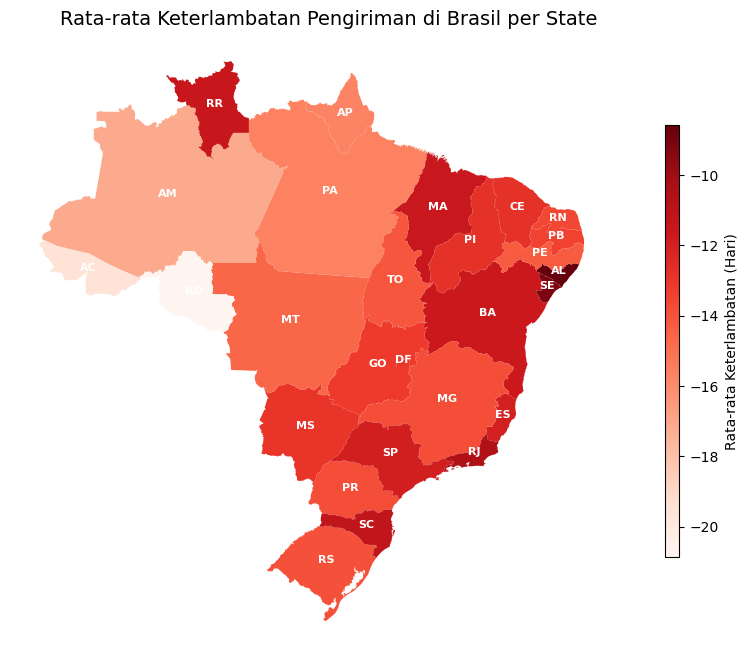

In [57]:
# Choropleth Map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
brasil_map_merged.plot(column="shipping_delay_days", cmap="Reds", linewidth=0, edgecolor="black", 
                       legend=True, legend_kwds={'label': "Rata-rata Keterlambatan (Hari)",
                                                 'orientation': "vertical",
                                                 'shrink': 0.7,  
                                                 'aspect': 30,    
                                                 'pad': 0.02},    
                       ax=ax)

for idx, row in brasil_map_merged.iterrows():
    centroid = row["centroid"]
    state_name = row["customer_state"]
    ax.text(centroid.x, centroid.y, f"{state_name}", fontsize=8, ha="center", color="white", fontweight="bold")
    
ax.set_title("Rata-rata Keterlambatan Pengiriman di Brasil per State", fontsize=14)
ax.axis("off")
plt.show()


**Interpretasi**

- **Semua nilai `shipping_delay_days` negatif**, yang berarti pesanan dikirim **lebih cepat** dari estimasi di seluruh state.
- **State dengan pengiriman tercepat:**  
  - RO (Rondônia): 20.85 hari lebih cepat  
  - AC (Acre): 19.51 hari lebih cepat
  - AM (Amazonas): 17.14 hari lebih cepat

**Mengapa bisa terjadi?**
- Sistem mungkin mengestimasi waktu pengiriman **lebih lama** dari yang sebenarnya diperlukan sehingga banyak pesanan tiba lebih awal.
- Bisa jadi infrastruktur transportasi, rute pengiriman, atau efisiensi logistik **lebih baik** dari perkiraan sistem.
- State yang berada di wilayah terpencil seperti **AC, AM, RO, dan PA** menunjukkan waktu pengiriman yang **lebih cepat** dari estimasi.

**Insight:**

Wilayah utara seperti Acre (AC), Rondônia (RO), dan Amazonas (AM) memiliki keterlambatan negatif yang lebih besar (-17 hingga -20 hari) dibanding state lainnya. Wilayah tenggara seperti São Paulo (SP) dan Rio de Janeiro (RJ) memiliki keterlambatan negatif yang lebih kecil (-11.92 dan -10.53 hari). Hal ini berarti sistem lebih akurat dalam memperkirakan waktu pengiriman di kota-kota besar dibanding wilayah terpencil.

## Conclusion

**Pertanyaan 1: Tren Jumlah Pesanan Sepanjang Tahun 2017**  

Jumlah pesanan menunjukkan tren **meningkat sepanjang tahun** dengan lonjakan tertinggi di bulan Desember yang kemungkinan dipengaruhi oleh tren belanja akhir tahun dan strategi promosi. Meskipun terjadi peningkatan secara umum, terdapat beberapa fluktuasi seperti penurunan di bulan April dan September yang bisa dikaitkan dengan faktor musiman atau perubahan pola belanja pelanggan. Analisis lebih lanjut diperlukan untuk memahami penyebab fluktuasi ini dan bagaimana strategi bisnis dapat menyesuaikan diri.  

---

**Pertanyaan 2: Pengaruh Keterlambatan Pengiriman terhadap Review Score**  

Terdapat hubungan **negatif dan lemah** antara keterlambatan pengiriman dan review score (**Pearson = -0.1954**), yang berarti semakin lama keterlambatan, semakin rendah rating pelanggan, tetapi bukan satu-satunya faktor penentu. Oleh karena itu, mengurangi keterlambatan pengiriman saja tidak cukup. Perusahaan juga perlu meningkatkan layanan pelanggan dan memastikan kualitas produk untuk mempertahankan kepuasan pelanggan dan rating yang tinggi.  

---

**Pertanyaan 3: Distribusi Geografis Akurasi Pengiriman**  

Semua pesanan yang dikirim ke setiap State di Brasil pada tahun 2017 ternyata sampai ke pelanggan **lebih cepat dari estimasi**. Hal ini mungkin saja terjadi karena sistem estimasi pengiriman mungkin terlalu konservatif sehingga pesanan tiba lebih cepat dari yang diprediksi. Wilayah terpencil seperti AC, AM, dan RO memiliki estimasi pengiriman yang berlebihan, sedangkan wilayah metropolitan seperti São Paulo (SP) dan Rio de Janeiro (RJ) memiliki estimasi yang lebih akurat. Perusahaan dapat menyesuaikan estimasi pengiriman agar lebih akurat, mengoptimalkan biaya logistik, dan memastikan pelanggan memiliki ekspektasi realistis terkait waktu pengiriman.  